In [42]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Загружаем данные
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Список с названиями классов
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 
           'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

# Преобразование размерности изображений
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# Нормализация данных
x_train = x_train / 255 
x_test = x_test / 255 

# Преобразуем метки в категории
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [44]:
# Создаем последовательную модель
model = Sequential()

# Добавляем уровни сети
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Компилируем модель
model.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 800)               628000    
                                                                 
 dense_5 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [45]:
# Обучаем сеть
epochs_list = [100,200,300,400,500]
scores_list = []
for i in range(0,len(epochs_list)):
    history = model.fit(x_train, y_train, batch_size=200, epochs=epochs_list[i],validation_split=0.2,verbose=1)
    scores = model.evaluate(x_test, y_test, verbose=1)
    scores_list.append(scores)
print(scores_list)


Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 1.2039 - accuracy: 0.6551 - val_loss: 0.8390 - val_accuracy: 0.7431
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.7631 - accuracy: 0.7655 - val_loss: 0.6943 - val_accuracy: 0.7826
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.6643 - accuracy: 0.7915 - val_loss: 0.6281 - val_accuracy: 0.7999
Epoch 4/100
240/240 [==============================] - 1s 6ms/step - loss: 0.6118 - accuracy: 0.8048 - val_loss: 0.5906 - val_accuracy: 0.8090
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5777 - accuracy: 0.8134 - val_loss: 0.5612 - val_accuracy: 0.8163
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5530 - accuracy: 0.8188 - val_loss: 0.5434 - val_accuracy: 0.8183
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5338 - accuracy: 0.8248 - val_loss: 0.5272 - val_accuracy: 0.8210

[0.37637484 0.86659998 0.33148438 0.88389999 0.3263905  0.89050001
 0.35059059 0.89099997 0.39256865 0.89249998]


Text(0.5, 1.0, 'Зависимость лоса от епох')

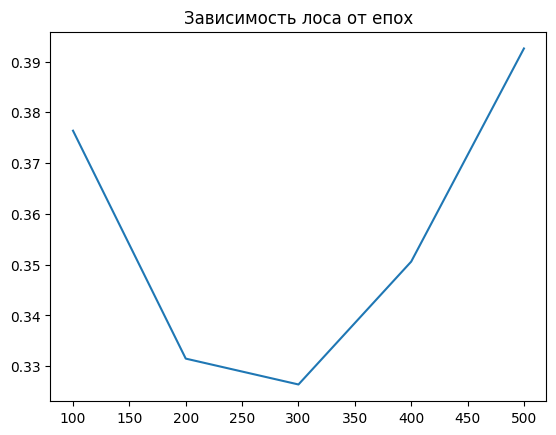

In [67]:
list = np.array(scores_list).flatten()
print(list)
plt.plot(epochs_list,list[::2], linestyle = "solid")
plt.title("Зависимость лоса от епох")

Text(0.5, 1.0, 'Зависимость лоса от епох')

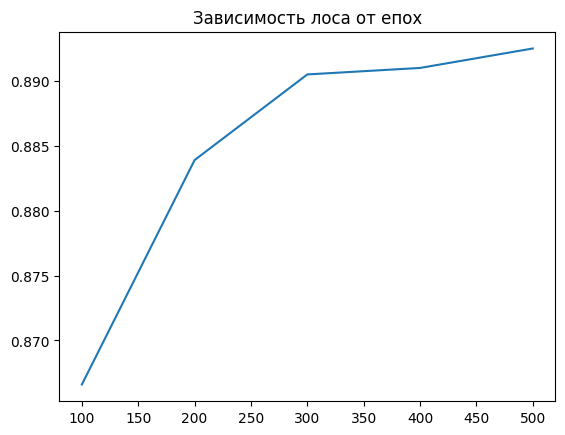

In [70]:
plt.plot(epochs_list,list[1::2], linestyle = "solid")
plt.title("Зависимость aкураси от епох")

In [80]:
# Оцениваем качество обучения сети на тестовых данных
for i in scores_list:
    print("Доля верных ответов на тестовых данных, в процентах:", round(scores_list[1] * 100, 4))

TypeError: type list doesn't define __round__ method

: 